# CS 171 PS 1
# Due: Friday, January 26, 2024 @ 11:59pm

## Read *all* cells carefully and answer all parts (both text and missing code)

### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
    Your Name (submitter): Shivam  <br>
    Your student ID (submitter): X717670
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>


<div class="alert alert-success">
    <font size=+2>Total Problem Set Grading</font> (to be completed by grader)<br>
    Total Points: /20<br>
    Late Days Used on this Assignment: <br>
    Total Late Days Used: <br>
</div>

## Overview

This problem set deals with IMDB review data (from [here](https://ai.stanford.edu/~amaas/data/sentiment/)).  This dataset consists of reviews with either bad (<=4) or good (>=7) ratings.  The cells below load in training and testing data.  For each point, there are 1000 features, corresponding to the 1000 most common words in the reviews.  Each feature's value is either "none," "once," "couple," "few," "many," or "lots" indicating qualitatively how often the word appears in the review.  These values are encoded as integers from 0 to 5, with 0 indicating "none" and 5 indicating "lots."  These are categorical features.  The corresponding y values are 0 for a "bad" rating and 1 for a "good" rating.

In [503]:
## THESE ARE THE ONLY LIBRARIES YOU MAY IMPORT!!
import numpy as np
import matplotlib.pyplot as plt

# below line just to make figures larger
plt.rcParams["figure.figsize"] = (20,10)

In [505]:
def loaddata(fname):
    # ignore how this works! (I'm manipulating a dataset to match the needs for this problem set)
    M = np.loadtxt(fname,dtype=float)
    rs = np.random.RandomState(seed=8675309)
    np.random.shuffle(M)
    bi = np.where(M[:,0]==-1)[0]
    gi = np.where(M[:,0]==1)[0]
    M = M[np.hstack((gi,bi[:-4166])),:]
    np.random.shuffle(M)
    X = M[:,1:]
    threshs = [0,1,2,5,10,20,1024]
    for (i,(t1,t2)) in enumerate(zip(threshs[:-1],threshs[1:])):
        X[(X>t1) & (X<=t2)] = i
    Y = M[:,0]
    Y[Y<=0] = 0 # data is originally +1, -1
    return (X,Y)

In [506]:
(trainX,trainY) = loaddata('/usr/local/cs171/imdbtrain.txt')
(testX,testY) = loaddata('/usr/local/cs171/imdbtest.txt')

<div style="color: #000000;background-color: #FFFFEE"><font size=+2>Question 1:</font> <font size=+1>(4 points)</font></div>
<div class="alert alert-success">
    <font size=+1>Grading</font> (to be completed by grader)<br>
    Score: /4<br>
</div>

<div style="color: #000000;background-color: #FFFFEE">
In the cell below, plot a grid of histograms (5 columns, 5 rows)
Each histogram should be the distribution of a different feature (so you will be plotting just the first 25 features).  The histograms should have two sets of bars (each in their own color): ones for examples from class 0 and one for examples from class 1.  You want side-by-side histograms, each with 6 bars (for 12 bars in two colors). Be sure to give a title to each plot with the feature number.  Use only the training data for these histograms.
    
Hint: look up pyplot's [subplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html) and [hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) functions
    
As an example, the histogram in the upper left, corresponding to feature 0, should look like
    
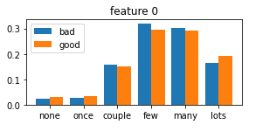
</div>

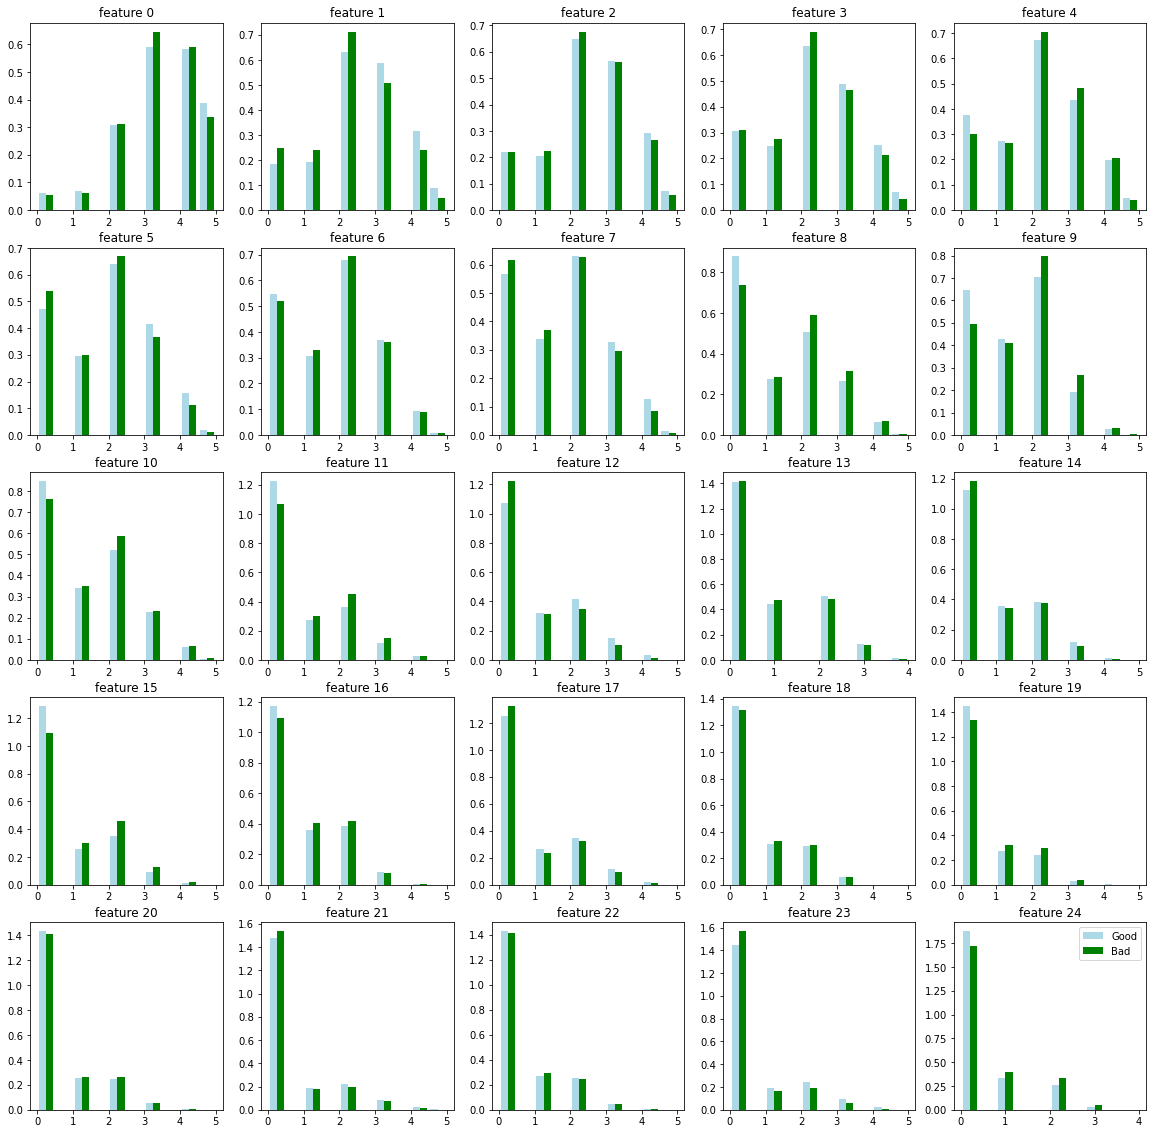

In [516]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
#n= trainX[:,0]
f=0;
#for k in range(25):
    #for n in range (25):
            #ihave to find out the conditional property of each feature with the outcome y...
       #feature_occ = np.sum((trainX[n, k] == f) & (trainY[:] == 0)) 
        #print("trainX[",n,",",k,"]= ",trainX[n,k] , f)
#print(feature_occ)
#print(feature_occ.shape)
for i in range(5):
    for j in range(5):
        feature_index = i * 5 + j
        x1 = trainX[np.where(trainY[:] == 1)[0], feature_index]  # Good review
        #print("Good reviews",x1.shape)
        #print("bad reviw",x2.shape)
        x2 = trainX[np.where(trainY[:] == 0)[0], feature_index]  # Bad review
        ax[i, j].set_title(f'feature {feature_index}')
        ax[i, j].hist([x1, x2], density=True, histtype='bar', color=['lightblue', 'green'], label=['Good', 'Bad'])
ax_flat = ax.flatten()
ax_flat[-1].legend()

plt.show()


<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 2:</font> <font size=+1>(4 points)</font>
   </div>
   <div class="alert alert-success">
    <font size=+1>Grading</font> (to be completed by grader)<br>
    Score: /4<br>
</div>

<div style="color: #000000;background-color: #FFFFEE">
    
For the 25 features above, based on the histograms you plotted, which would the most helpful three features for classifying this dataset using naive Bayes?  Which would be the least helpful feature?  <b>WHY?</b>
</div>
    

### Your Answer Here 
If i have to just use my visualization to find out the most helpful 3 features for classifying this dataset, i have to look for features which have the most noticable difference between their classes which tells us that that the feature is informative for distinguishing between the classes and to know which one is the least beneficial, i have to look for the feature which does not differ between the classes as much as the other features. So, feature 22 i think is the least beneficial cuz it is not as informative as it is not making a clear distinction between the classes which signifies that the feature doesnt signify much in the classification . Feature no. 1,8,9 are the most helful features out of all based on the difference. 

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 3:</font> <font size=+1>(10 points)</font>
   </div>
   <div class="alert alert-success">
    <font size=+1>Grading</font> (to be completed by grader)<br>
    Score: /10<br>
</div>

<div style="color: #000000;background-color: #FFFFEE">
        
Complete the two functions in the two cells below.

The first trains/learns a naive Bayes classifier.  The second predicts the classes for a set of examples based on the model learned.
    
Hint:  Test your code on the example from the slides in class.  You'll need to generate the data matrix yourself and your own testing examples.
    
Hint 2: You will have to deal with counts that are 0.  Leaving them as zero will result in 0 probabilities that will cause problems.  A standard way to handle this is to add 1 to all counts (this is often called LaPlace smoothing).  For frequent feature values, it does not change things much.  For infrequent values, it keeps them away from 0 and admits that they might happen more often than was seen in the data.  This is like pretending there are extra examples that cause the raw counts to increase by 1.  
</div>

In [515]:
def learnnb(X, Y):
    # X is shape (m, n) (m data points, each with n features). It has integer values from 0 to maxfeatval (inclusive)
    # Y is shape (m,) (m data points). It has values of either 0 or 1 (class "0" or class "1")
    maxfeatval = int(X.max().max())
    m, n = X.shape
    priorp = np.zeros(2)
    priorp[0] = np.sum(Y == 0) / m
    priorp[1] = np.sum(Y == 1) / m
    condp = np.zeros((n, int(maxfeatval) + 1, 2))
    
    for i in range(n):
        for j in range(maxfeatval + 1):
            counts_0 = np.sum((X[:, i] == j) & (Y == 0)) + 1
            counts_1 = np.sum((X[:, i] == j) & (Y == 1)) + 1
            y0 = np.sum(Y == 0)
            y1 = np.sum(Y == 1)
            condp[i, j, 0] = counts_0 / (y0 + maxfeatval + 1)
            condp[i, j, 1] = counts_1 / (y1 + maxfeatval + 1)
             
    # this function is to return a pair (priorp, condp)
    # where priorp is of shape (2,) and has the prior probability of each of the two classes
    # and condp is of shape (n, maxfeatval+1, 2) and has the conditional probabilities for the naive Bayes classifier
        
    return priorp, condp
priorp, condp = learnnb(trainX, trainY)
np.set_printoptions(suppress=True, precision=6)
print("Prior Probabilities:")
print(priorp)
print("\nConditional Probabilities:")
print(condp)

Prior Probabilities:
[0.400019 0.599981]

Conditional Probabilities:
[[[0.026619 0.030945]
  [0.030336 0.035423]
  [0.155396 0.153126]
  [0.323141 0.295218]
  [0.295444 0.29122 ]
  [0.169065 0.194067]]

 [[0.12482  0.092116]
  [0.120863 0.096034]
  [0.356595 0.316088]
  [0.252878 0.293779]
  [0.119904 0.158004]
  [0.02494  0.043979]]

 [[0.109712 0.110187]
  [0.111151 0.101791]
  [0.338249 0.323285]
  [0.280935 0.282904]
  [0.132254 0.14633 ]
  [0.027698 0.035503]]

 ...

 [[0.998082 0.998881]
  [0.001439 0.00072 ]
  [0.00012  0.00016 ]
  [0.00012  0.00008 ]
  [0.00012  0.00008 ]
  [0.00012  0.00008 ]]

 [[0.996882 0.997441]
  [0.002158 0.001919]
  [0.0006   0.0004  ]
  [0.00012  0.00008 ]
  [0.00012  0.00008 ]
  [0.00012  0.00008 ]]

 [[0.997962 0.997601]
  [0.001559 0.001999]
  [0.00012  0.00016 ]
  [0.00012  0.00008 ]
  [0.00012  0.00008 ]
  [0.00012  0.00008 ]]]


In [581]:
def prednb(X, model):
    # X is of shape (m, n) (m data points, each with n features).
    # model is the pair (priorp, condp), as returned from learnnb.
    # Should return something of shape (m,) which is an array of 0s and 1s,
    # indicating the predicted (most probable under NB) class for each example in X.
    (priorp, condp) = model
    
    m, n = X.shape
    predictions = np.zeros(m)
    
    for i in range(m):
        log_prob_0 = np.log(priorp[0])  # Log prior for class 0
        log_prob_1 = np.log(priorp[1])  # Log prior for class 1
        
        for j in range(n):
            prob_0 = condp[j, X[i, j], 0]
            prob_1 = condp[j, X[i, j], 1]
            
            log_prob_0 += np.log(prob_0)
            log_prob_1 += np.log(prob_1)
        
        predictions[i] = 0 if log_prob_0 >= log_prob_1 else 1

    return predictions.astype(int)

# Example usage
testX = np.random.randint(5, size=(20834, 10))  # Replace this with your own test data
model = learnnb(trainX, trainY)
predictions = prednb(testX, model)
print("Predictions:")
print(predictions)


Predictions:
[0 1 1 ... 1 1 1]


<div style="color: #000000;background-color: #FFFFEE">
<font size=+2>Question 4:</font> <font size=+1>(2 points)</font>
    </div>
    <div class="alert alert-success">
    <font size=+1>Grading</font> (to be completed by grader)<br>
    Score: /2<br>
</div>
    

<div style="color: #000000;background-color: #FFFFEE">
The code below trains a naive Bayes classifier and then tests it on the testing examples and reports the error rate.
    
Run the code.  [note, just because your code runs on this example, does not mean it is correct.]
    
Then answer the question, "<b>Is this error rate good?  How do you know?</b>"
</div>


In [584]:
def errorrate(predY,trueY):
    if len(predY.shape)>1: 
        predY = predY[:,0]
    if len(trueY.shape)>1:
        trueY = trueY[:,0]
    return (predY!=trueY).mean()
model = learnnb(trainX,trainY)
predY = prednb(testX,model)
print(errorrate(predY,testY))

0.43525007199769605


# I think this Error rate is a decent one, even though a substantial portion of the predictions are wrong. i think its good for a program which is predicting whether the review is good or not based on just words which can be a lot challlenging as most of the reviews must be in a sentence formation which is inferring to a negative positive some of the reviews might be sarcastic. And the complexities of natural language makes it difficult to be categorizable. morevoer, a decent error rate means its fast and largely right.